In [25]:
import numpy as np
import matplotlib.pyplot as plt
import sklearn
import pandas as pd
import os
os.environ['OMP_NUM_THREADS'] = '1'

In [26]:
df = pd.read_csv('./data.csv')
data = df[['timestamp', 'left_x', 'left_y', 'right_x', 'right_y']].to_numpy()

In [27]:
maxarr = data.max(axis=0)

In [28]:
minarr = data.min(axis=0)

In [29]:
for i in  range(len(maxarr)):
  print("Max: {} Min:{}".format(maxarr[i], minarr[i]))

Max: 1638701284.02901 Min:1638700185.8748684
Max: 1.1193199157714844 Min:-0.1765042245388031
Max: 1.8763995170593264 Min:-0.0445428416132926
Max: 0.9834598898887634 Min:-0.1502360105514526
Max: 1.6791791915893557 Min:-0.1431277245283126


In [30]:
print(maxarr[0]-minarr[0])

1098.154141664505


In [31]:
def split_by_timestamp(data,group_interval):
    current_group_start_time = data[0][0]
    current_group_end_time = current_group_start_time + group_interval
    current_group_data = []
    groups = []  # 存储所有的分组
    for datum in data: 
        if datum[0] < current_group_end_time:
            # 如果时间戳在当前分组的时间范围内，将数据添加到当前分组
            current_group_data.append(datum)
        else:
            # 如果时间戳超出了当前分组的时间范围，将当前分组存储到groups列表中，并开始一个新的分组
            groups.append(current_group_data)
            current_group_data = [datum]
            current_group_start_time = current_group_end_time
            current_group_end_time = current_group_start_time + group_interval
    # 将最后一个分组存储到groups列表中
    groups.append(current_group_data)
    return groups

In [32]:
group1 = split_by_timestamp(data,3)

In [33]:
print(len(group1[0]))

68


In [34]:
from sklearn.cluster import KMeans

In [35]:
def clusting(data,axs):
    data = np.array(data)
    X = data[:,1:]
    n_clusters=int(len(X)/10)
    if(n_clusters<=1):
        return
    kmeans = KMeans(n_clusters=n_clusters, init='k-means++',n_init=10)
    # 使用KMeans算法进行聚类
    kmeans.fit(X)
    labels = kmeans.labels_
    centers = kmeans.cluster_centers_
    # print('Cluster centers:')
    # print(centers)
    axs.scatter(X[:, 0], X[:, 1], c=labels)
    axs.scatter(centers[:, 0], centers[:, 1], marker='x', s=200, linewidths=3, color='r')

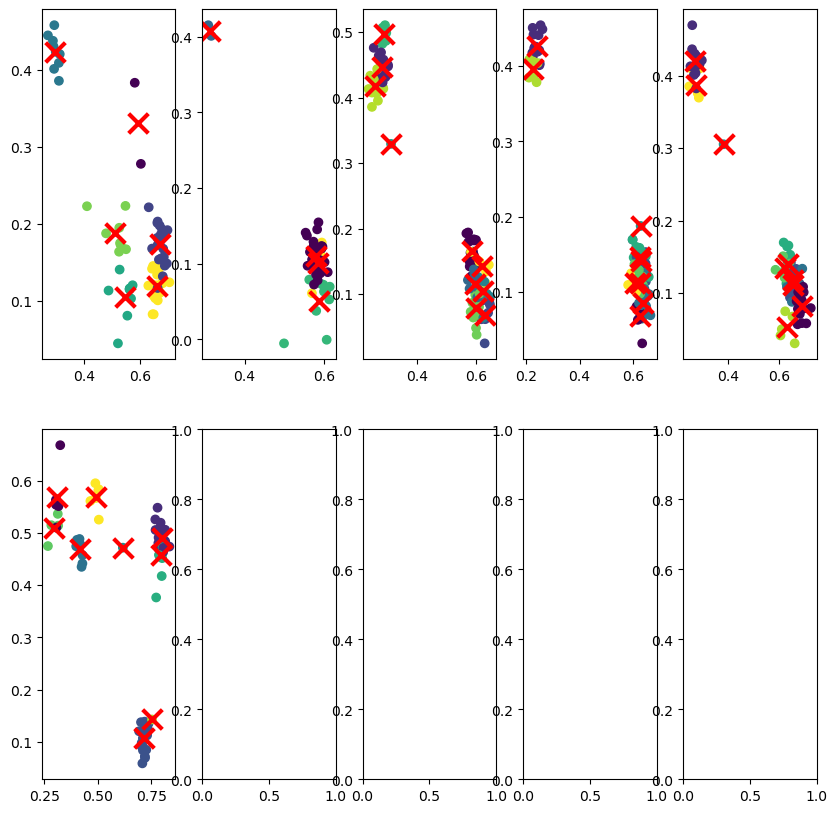

[array([1.63870024e+09, 3.73713374e-01, 4.59812224e-01, 3.73953730e-01,
       5.67963958e-01])]


In [36]:
os.environ['OMP_NUM_THREADS'] = '1'
fig, axs = plt.subplots(int((len(group1[:10])+5-1)/5),5, figsize=(10, 10))
for i in range(len(group1[:10])):
    clusting(group1[i],axs[int(i/5)][i%5])
plt.show()